<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/nlp/tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【自然語言處理 - 概念篇】 探索TF-IDF, 關於詞的統計與索引隱含著什麼奧秘呢？

所謂TF-IDF是由兩個名詞所組成的, 分別是「詞頻(Term Frequency,TF)」和「逆文檔頻率(Inverse Document Frequency,IDF)。

## 詞頻: TF

表示詞在文檔中出現的頻率, 就統計學而言, 只要這個詞在文本中出現越多次代表越值得關注, 因此它會具有一個重要的統計評估指標之一, 但並不是完全相信此統計方式, 看完底下的IDF就會知道為什麼。

## 逆文檔頻率: IDF

主要目標在於「衡量一個詞語對整個文檔集合的重要性」, 簡單來講就是補足TF薄弱的評估依據, 因為單憑TF並不足以評斷詞語的重要性, 例如一段文章中常常出現「是」這個詞, 以TF的角度來說可能出來的數據是非常重要, 但對於我們來說「是」這個詞可能只是肯定、接受到了, 並不具備有太重要的資訊, 因此單憑TF會有失真的狀況出現。 

因此IDP就是在平衡此狀況, 目標是讓稀有的詞語(在較少的文檔中出現)具有較高的IDF值, 而常見的詞語(在較多的文檔中出現)具有較低的IDF值。

怎麼做呢？ 就是藉由底下很簡單的一個公式：

***`IDF = log((N(文檔總數) + 1) / (df(包含「詞」的文檔數量) + 1)) + 1`***

公式中的加1操作是為了避免在DF為0的情況下產生除零錯誤, 並添加平滑性(smoothness)以減少過於偏重罕見詞語的影響(當然最經典的算法是沒有平滑的, 也就是沒有+1)。

舉例來說, 假設文檔總數有5篇, 「是」這個詞在各篇文檔都有出現, 因此推算出來就會是：

`log(6 / 6) + 1 = 1`


由此可知IDF的公式之下, 「是」這個詞的權重為「1」, 可能不是一個非常重要的詞語。

## TF與IDF的結合

***`TF-IDF = TF x IDF`***


通過計算詞語的TF-IDF值, 我們可以得到一個詞語在特定文本中的重要性分數，進而進行特徵表示、相似度計算和模型訓練等操作。


## 搭配實作更加明白...

接下來我們就用實作為出發點來逐一說明, 讓我們更容易進入狀況。

### 準備必要套件

In [ ]:
# 斷詞
!pip install jieba

# 表格化
!pip install pandas

# 圖表化
!pip install matplotlib

## 下載中文字型讓圖表可以顯示中文

為什麼?

請參考「[🖋 【Google Colab Python系列】 視覺化資料Matplotlib 如何繪製出中文？](https://www.potatomedia.co/s/PDf86nk)」

In [50]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 下載繁體中文字型
!wget -O SourceHanSerifTW-VF.ttf https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf

# 加入字型檔
fm.fontManager.addfont('SourceHanSerifTW-VF.ttf')

# 設定字型
# 
mpl.rc('font', family='Source Han Serif TW VF')

--2023-05-20 07:08:44--  https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf [following]
--2023-05-20 07:08:45--  https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16883324 (16M) [application/octet-stream]
Saving to: ‘SourceHanSerifTW-VF.ttf’

SourceHanSerifTW-VF 100%[===================>]  16.10M  --.-KB/s

### 定義中文語句


In [140]:

sentences = [
    '我喜歡看書尤其是小說和詩歌',
    '健康是最重要的財富',
    '這部電影真的是很精彩',
    '環保意識的提升對我們的地球來說是非常重要的',
    '這真的是太棒了'
]

### 自訂分詞器

由於NLP世界中最小的單位是「詞」, 因此我們就要藉由jieba這套斷詞工具幫我們預先進行斷詞。

In [141]:
import jieba
def tokenizer(text):
    return list(jieba.cut(text))

### TF詞頻矩陣



In [142]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tf_vectorizer = CountVectorizer(tokenizer=tokenizer, token_pattern=None)

tf_matrix = tf_vectorizer.fit_transform(sentences)

# 取得詞語列表
feature_names = tf_vectorizer.get_feature_names_out()

tf_matrix = tf_matrix.toarray()


tf = pd.DataFrame(tf_matrix, columns=feature_names)

tf

,來,健康,和,喜歡,地球,太棒了,對,小,尤其,很,...,真的,精彩,詩歌,說,財富,這,這部,重要,電影,非常
0,0,0,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### IDF矩陣

以「來」這個字詞來說, 總共出現1次, 套上idf公式之後

log((N(文檔總數) + 1) / (df(包含「詞」的文檔數量) + 1)) + 1

log((5+1) / (1+1)) + 1 = 2.0986

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

idf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None)

idf_vectorizer.fit_transform(sentences)

idf_vector = idf_vectorizer.idf_

idf = pd.DataFrame(idf_vector, index=feature_names, columns=["IDF"])

idf

,IDF
來,2.098612
健康,2.098612
和,2.098612
喜歡,2.098612
地球,2.098612
太棒了,2.098612
對,2.098612
小,2.098612
尤其,2.098612
很,2.098612


### TF-IDF

以「來」這個詞來進行計算。

```
TF = 1

IDF = 2.098612

TF-IDF = 1 * 2.098612 = 2.098612
```

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_matrix = tf_matrix * idf_vector

tfidf = pd.DataFrame(tfidf_matrix, columns=feature_names)

tfidf

,來,健康,和,喜歡,地球,太棒了,對,小,尤其,很,...,真的,精彩,詩歌,說,財富,這,這部,重要,電影,非常
0,0.000000,0.000000,2.098612,2.098612,0.000000,0.000000,0.000000,2.098612,2.098612,0.000000,...,0.000000,0.000000,2.098612,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,1.693147,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,...,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000
3,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,2.098612
4,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,...,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000


### 以上自己用土炮的方式相乘, 接下來我們可以看看sklearn計算出來的結果。

norm=False主要是我們想要讓計算方式回歸本質, 沒有經過歸一化。

與我們上述的計算結果一致。

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, norm=None)

tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

tfidf

,來,健康,和,喜歡,地球,太棒了,對,小,尤其,很,...,真的,精彩,詩歌,說,財富,這,這部,重要,電影,非常
0,0.000000,0.000000,2.098612,2.098612,0.000000,0.000000,0.000000,2.098612,2.098612,0.000000,...,0.000000,0.000000,2.098612,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,1.693147,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,...,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000
3,2.098612,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,2.098612
4,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,...,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000


## 繪製TF-IDF圖表

這邊使用雷達圖來直觀的比較。

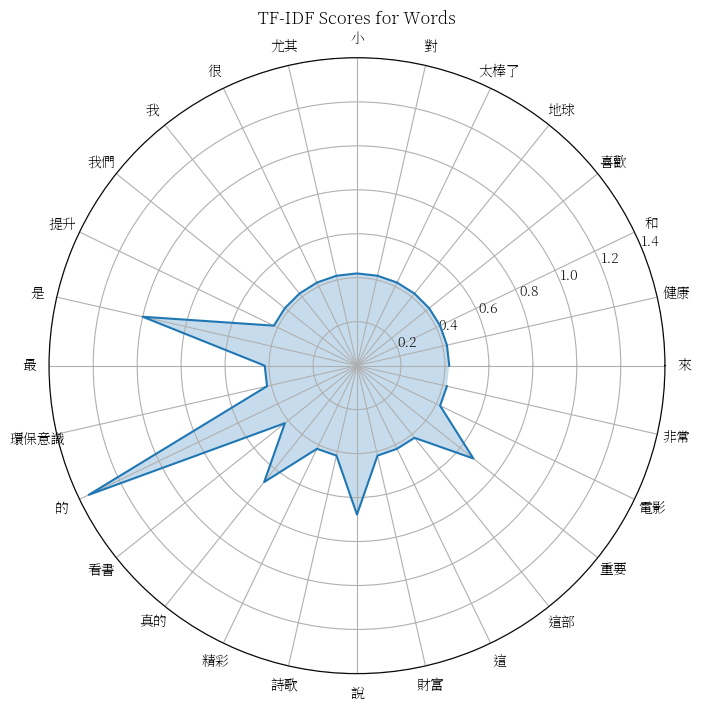

In [150]:
import matplotlib.pyplot as plt
import numpy as np


# 獲取每個詞彙的TF-IDF值
tfidf_scores = tfidf_matrix.toarray().T

# 繪製每個詞彙的TF-IDF值
plt.figure(figsize=(8, 8))
plt.polar(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), tfidf_scores.mean(axis=1))
plt.fill(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), tfidf_scores.mean(axis=1), alpha=0.25)
plt.xticks(np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False), feature_names, rotation=90)
plt.title('TF-IDF Scores for Words')
plt.show()